In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import the necessary librar ies
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import f1_score,recall_score,accuracy_score
from sklearn.svm import SVC
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import  cross_val_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 

In [4]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import r2_score

In [5]:
df=pd.read_csv("../input/heart-failure-prediction/heart.csv")
df.head

<bound method NDFrame.head of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease

In [6]:
dummy_set = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
df_dummies = pd.get_dummies(df[dummy_set])
df_dummies.head()

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [7]:
from sklearn.preprocessing import StandardScaler 
num_set = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']
scaler = StandardScaler()
df_StS = scaler.fit_transform(df[num_set])
df_sts = pd.DataFrame(df_StS)
df_sts

,0,1,2,3,4,5
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432
...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.551341,-0.188999,0.293283
914,1.536902,0.627078,-0.053049,1.813758,0.164684,2.357094
915,0.370100,-0.129513,-0.620168,-0.551341,-0.857069,0.293283
916,0.370100,-0.129513,0.340275,-0.551341,1.461525,-0.832432


In [8]:
def cap_feature(fea):
  ql = df[fea].quantile(0.25) - 1.5 * (df[fea].quantile(0.75) - df[fea].quantile(0.25))
  qu = df[fea].quantile(0.25) + 1.5 * (df[fea].quantile(0.75) - df[fea].quantile(0.25))

  df[fea] = np.where(df[fea] > qu, qu, np.where(df[fea] < ql, ql, df[fea]))

In [9]:
from sklearn.preprocessing import StandardScaler 
num_set = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']

cap_feature("RestingBP")
cap_feature("Cholesterol")
cap_feature("MaxHR")
cap_feature("Oldpeak")

scaler = StandardScaler()
df_StS = scaler.fit_transform(df[num_set])
df_sts = pd.DataFrame(df_StS)
df_sts.columns = num_set

df_trans = pd.concat([df_sts,df_dummies],axis=1)
df_trans.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.660474,0.964714,-0.551341,1.453478,-0.914688,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,-0.478484,1.358752,-0.230068,-0.551341,0.801749,0.227583,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.037804,0.898946,-0.551341,-1.560768,-0.914688,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,-0.584556,0.520818,0.142616,-0.551341,-1.153438,0.798719,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0.051881,1.358752,-0.065648,-0.551341,-0.583175,-0.914688,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [10]:
X_train,X_test,y_train,y_test = train_test_split(df_trans, df['HeartDisease'], test_size = 0.2, random_state = 1000)

print("X_train shape:", X_train.shape, "X_test shape:", X_test.shape,"y_train shape:", y_train.shape,"y_test shape:", y_test.shape)

X_train shape: (734, 20) X_test shape: (184, 20) y_train shape: (734,) y_test shape: (184,)


In [11]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
291,-0.690629,0.660474,0.613953,-0.551341,-0.053645,0.227583,1,0,0,1,0,0,0,1,0,1,0,0,0,1
139,-1.114921,1.358752,0.504339,-0.551341,-0.257310,1.369855,0,1,1,0,0,0,0,1,0,0,1,0,1,0
536,0.900464,0.171679,-1.845490,1.813758,-0.705374,0.456038,0,1,0,0,1,0,0,0,1,0,1,0,1,0
710,-0.690629,-1.434361,0.811256,-0.551341,-0.746107,0.227583,0,1,1,0,0,0,1,0,0,0,1,0,1,0
336,1.961193,1.358752,-1.845490,-0.551341,-0.909039,0.912946,0,1,0,0,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-0.584556,-0.736083,0.646836,-0.551341,-0.868306,1.369855,0,1,1,0,0,0,0,1,0,1,0,0,1,0
704,-0.372411,1.358752,0.460494,-0.551341,-0.338777,1.655423,0,1,1,0,0,0,1,0,0,1,0,0,1,0
71,-1.008848,-0.037804,0.153578,-0.551341,-0.053645,-0.914688,0,1,0,1,0,0,0,1,0,1,0,0,0,1
599,0.264027,-0.037804,0.022042,1.813758,-1.560768,0.798719,0,1,1,0,0,0,0,1,0,1,0,0,1,0


In [12]:
x = np.hstack([np.ones((X_train.shape[0], 1)), X_train])

In [13]:
X_train.shape,y_train.shape

((734, 20), (734,))

## Learning curve

In [14]:
# from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py]
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, 
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


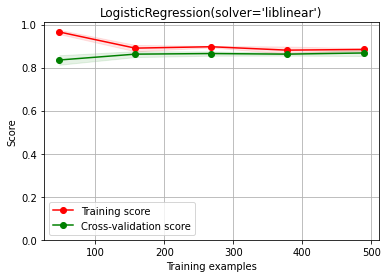

<Figure size 1080x360 with 0 Axes>

In [15]:

lr = LogisticRegression(solver='liblinear')
cv=ShuffleSplit(n_splits=5, test_size=0.4, random_state=0)
plot_learning_curve(lr, lr, X_train, y_train, cv=3, ylim=(0.0, 1.01), n_jobs=16)
plt.figure(figsize=(15,5))
plt.show()

from the graphic, we can get that the training score and validation score get converged, and  training set is always in high position, and it barely changes.So, we assumed that it might be overfitted

## training

In [16]:
def sigmoid(x):
    '''
    Function to compute the sigmoid of a given input x.
    
    Input:
    x: it's the input data matrix. The shape is (N, H)

    Output:
    g: The sigmoid of the input x
    '''
    
    #####################################################
    g = 1 / ( 1 + np.exp(-x))
    #####################################################

    return g

def log_likelihood(theta,features,target):                          
    '''
    Function to compute the log likehood of theta according to data x and label y
    
    Input:
    theta: it's the model parameter matrix.
    features: it's the input data matrix. The shape is (N, H)
    target: the label array
    
    Output:
    log_g: the log likehood of theta according to data x and label y
    '''
    
    #####################################################
    m = features.shape[0]
    h = sigmoid(np.dot(features, theta))                  
    log_l =  ( np.dot(target, np.log(h)) + np.dot((1 - target), np.log(1 - h)) ) / m   #log_l=(y*log(sigθX)+(1-y)*log(1-sigθX))/m
    #####################################################

    return log_l


def predictions(features, theta):        #sigmoid(θX)
    '''
    Function to compute the predictions for the input features
    
    Input:
    theta: it's the model parameter matrix.
    features: it's the input data matrix. The shape is (N, H)
    
    Output:
    preds: the predictions of the input features
    '''
    
    #####################################################
    preds = sigmoid(np.dot(features, theta))
    #####################################################

    return preds                 

## For L1 regulartion:

In [17]:
def update_theta_L1(theta, target, preds, features, lr):          
    '''
    Function to compute the gradient of the log likelihood
    and then return the updated weights

    Input:
    theta: the model parameter matrix.
    target: the label array
    preds: the predictions of the input features
    features: it's the input data matrix. The shape is (N, H)
    lr: the learning rate
    
    Output:
    theta: the updated model parameter matrix.
    '''
    lamb=2
    #####################################################
    m = len(target)                                        
    preds = predictions(features, theta)                   
    G = np.dot(np.transpose(features), target - preds)+lamb     #G=X*(y-θX)+λ      
    theta = theta + lr * G / m                             #θ=θ+lr*G/m
    #####################################################
    return theta 

In [18]:
def gradient_ascent_L1(theta, features, target, lr, num_steps):     
    '''
    Function to execute the gradient ascent algorithm

    Input:
    theta: the model parameter matrix.
    target: the label array
    num_steps: the number of iterations 
    features: the input data matrix. The shape is (N, H)
    lr: the learning rate
    
    Output:
    theta: the final model parameter matrix.
    log_likelihood_history: the values of the log likelihood during the process
    '''

    log_likelihood_history = np.zeros(num_steps)                     
    
    #####################################################
    preds = predictions(features, theta)                                                      
    for i in range(num_steps):                                 
      theta = update_theta_L1(theta, target, preds, features, lr)      
      log_likelihood_history[i] = log_likelihood(theta, features, target)    
    
    #####################################################

    return theta, log_likelihood_history 

In [19]:
# Initialize theta0
theta0 = np.zeros(X_train.shape[1])                     
# Run Gradient Ascent method
n_iter=100
theta_final_L1, log_l_history_L1 = gradient_ascent_L1(theta0,X_train,y_train,lr=0.5,num_steps=n_iter)
print(theta_final_L1)

[ 0.17727834  0.1090984  -0.41228298  0.43441911 -0.08769335  0.4096824
 -0.58945768  0.42049339  1.11572092 -0.53652013 -0.38141013 -0.09427538
  0.00898718 -0.07723351  0.03552183 -0.58399354  0.41502926  0.03880471
  1.04416618 -1.11569539]


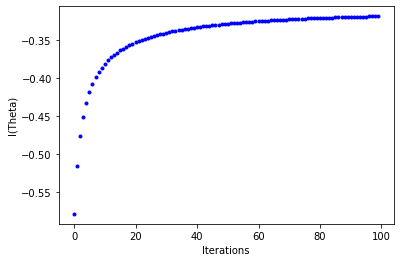

In [20]:
fig,ax = plt.subplots(num=2)

ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(len(log_l_history_L1)),log_l_history_L1,'b.')

In [21]:
preds = predictions(X_test, theta_final_L1)
TP=0
FP=0
FN=0
TN=0
for i in range(len(y_test)):
    if preds[i]>0.5 and y_test.values[i]==1:
        TP=TP+1
    elif preds[i]>0.5 and y_test.values[i]==0:
        FP=FP+1
    elif preds[i]<0.5 and y_test.values[i]==1:
        FN=FN+1
    elif preds[i]<0.5 and y_test.values[i]==0:
        TN=TN+1
Accuracy=(TP+TN)/(TP+TN+FP+FN)
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
F_Score=2*(Precision*Recall)/(Precision+Recall)
FPR=FP/(FN+TN)

In [22]:
print("f1_score:",F_Score)
print("score:",Precision)
print("recall_score:",Recall)
print("accuracy_score:",Accuracy)

f1_score: 0.8738738738738738
score: 0.8508771929824561
recall_score: 0.8981481481481481
accuracy_score: 0.8478260869565217


## Momentum

In [23]:
def update_theta_M(theta, target, preds, features, lr,v):          
    '''
    Function to compute the gradient of the log likelihood
    and then return the updated weights

    Input:
    theta: the model parameter matrix.
    target: the label array
    preds: the predictions of the input features
    features: it's the input data matrix. The shape is (N, H)
    lr: the learning rate
    
    Output:
    theta: the updated model parameter matrix.
    '''
    #####################################################
    m = len(target)                                        
    preds = predictions(features, theta)
    gama=0.9
    G = np.dot(np.transpose(features), target - preds)
    v=gama*v+lr * G / m 
    theta = theta + v
    #####################################################
    return theta,v 

In [24]:
def gradient_ascent_M(theta, features, target, lr, num_steps):     
    '''
    Function to execute the gradient ascent algorithm

    Input:
    theta: the model parameter matrix.
    target: the label array
    num_steps: the number of iterations 
    features: the input data matrix. The shape is (N, H)
    lr: the learning rate
    
    Output:
    theta: the final model parameter matrix.
    log_likelihood_history: the values of the log likelihood during the process
    '''

    log_likelihood_history = np.zeros(num_steps)                    
    
    #####################################################
    preds = predictions(features, theta)                        
    v=0
    for i in range(num_steps):                                 
      theta,v = update_theta_M(theta, target, preds, features, lr,v)      
      log_likelihood_history[i] = log_likelihood(theta, features, target)    
    
    #####################################################

    return theta, log_likelihood_history 

In [25]:
# Initialize theta0
theta0 = np.zeros(X_train.shape[1])                      
# Run Gradient Ascent method
n_iter=100
theta_final_M, log_l_history_M = gradient_ascent_M(theta0,X_train,y_train,lr=0.5,num_steps=n_iter)
print(theta_final_M)

[ 0.25940703  0.15165909 -0.44451869  0.3968047   0.0243849   0.33019303
 -1.00266092  0.61537735  1.42511533 -0.74836125 -0.51617346 -0.54786419
 -0.11024614 -0.1222941  -0.15474332 -0.58530415  0.19802058 -0.1470634
  1.21023846 -1.45045862]


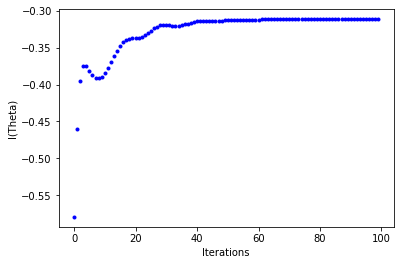

In [26]:
fig,ax = plt.subplots(num=2)

ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(len(log_l_history_M)),log_l_history_M,'b.')

In [27]:
preds = predictions(X_test, theta_final_M)
TP=0
FP=0
FN=0
TN=0
for i in range(len(y_test)):
    if preds[i]>0.5 and y_test.values[i]==1:
        TP=TP+1
    elif preds[i]>0.5 and y_test.values[i]==0:
        FP=FP+1
    elif preds[i]<0.5 and y_test.values[i]==1:
        FN=FN+1
    elif preds[i]<0.5 and y_test.values[i]==0:
        TN=TN+1
Accuracy=(TP+TN)/(TP+TN+FP+FN)
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
F_Score=2*(Precision*Recall)/(Precision+Recall)
FPR=FP/(FN+TN)

In [28]:
print("f1_score:",F_Score)
print("score:",Precision)
print("recall_score:",Recall)
print("accuracy_score:",Accuracy)

f1_score: 0.8687782805429864
score: 0.8495575221238938
recall_score: 0.8888888888888888
accuracy_score: 0.842391304347826


From the graphic, we can find that the loss function converges faster. It means that it get to the convergency with less iterations